In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data_covid = pd.read_csv("europe_covid.csv",delimiter = ",")
data_covid

,Country/Other,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,Albania,334084,3595,328802.0,1687.0,116553,1254,1941032,677173,2866374
1,Andorra,47781,165,47563.0,53.0,616824,2130,249838,3225256,77463
2,Austria,5747540,21589,5702341.0,23610.0,633917,2381,205247898,22637528,9066710
3,Belarus,994037,7118,985592.0,1327.0,105381,755,13646641,1446722,9432800
4,Belgium,4686147,33478,4631003.0,21666.0,401614,2869,36481740,3126574,11668278
5,Bosnia and Herzegovina,401232,16244,378996.0,5992.0,123482,4999,1883616,579696,3249317
6,Bulgaria,1294604,38154,1253005.0,3445.0,189142,5574,10952860,1600220,6844597
7,Channel Islands,100846,220,100278.0,348.0,571485,1247,1252808,7099551,176463
8,Croatia,1266749,17790,1247874.0,1085.0,312062,4383,5457095,1344348,4059286
9,Czechia,4586086,42269,4537555.0,6262.0,427138,3937,56853138,5295174,10736784


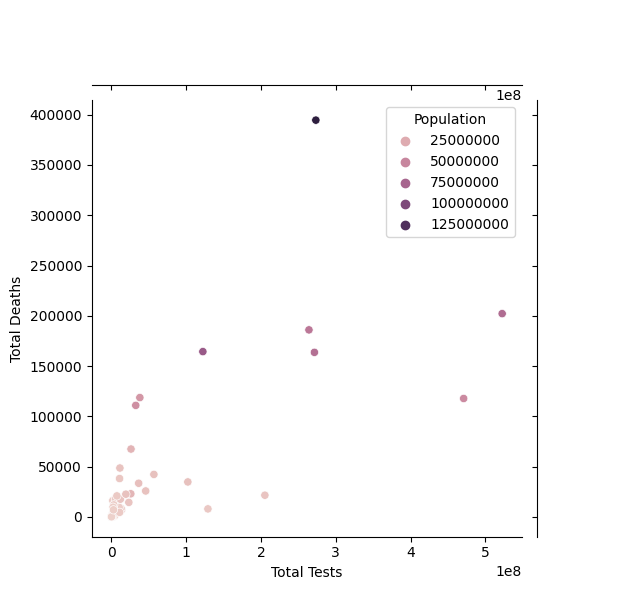

In [4]:
sns.jointplot(data = data_covid, x = "Total Tests", y = "Total Deaths", hue = "Population")

In [5]:
df1 = data_covid.sort_values(by=['Tot Cases/ 1M pop'],ascending = False).reset_index()

fig = px.choropleth(df1,
                    locations='Country/Other',
                    locationmode='country names',
                    color='Total Cases',
                    scope='europe',
                    hover_name='Country/Other',
                    color_continuous_scale='reds')


fig.update_layout(title= 'COVID-19 Cases in European Countries',
                  title_x = 0.5,
                  title_font = dict(size = 16, color = 'Darkred'),
                  geo = dict(showframe = False,
                             showcoastlines = False,
                             projection_type = 'equirectangular'))
fig.show()

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              47 non-null     int64  
 1   Country/Other      47 non-null     object 
 2   Total Cases        47 non-null     int64  
 3   Total Deaths       47 non-null     int64  
 4   Total Recovered    44 non-null     float64
 5   Active Cases       44 non-null     float64
 6   Tot Cases/ 1M pop  47 non-null     int64  
 7   Deaths/ 1M pop     47 non-null     int64  
 8   Total Tests        47 non-null     int64  
 9   Tests/ 1M pop      47 non-null     int64  
 10  Population         47 non-null     int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 4.2+ KB


In [7]:
df1 = data_covid.sort_values(by = ['Total Cases'],ascending = False).reset_index().head(10)

fig = px.bar(df1, x = 'Country/Other', y = 'Total Cases', color = 'Total Cases',
             color_continuous_scale = 'reds')

fig.update_layout(title = 'Top 10 countries with the most COVID-19 cases in Europe',
                  title_x = 0.5,
                  title_font = dict(size = 16, color = 'DarkRed'))
fig.show()

In [8]:
df1 = data_covid.sort_values(by = ['Total Deaths'],ascending = False).reset_index().head(10)

fig = px.bar(df1, x= 'Country/Other', 
             y ='Total Deaths', 
             color = 'Total Deaths',
             color_continuous_scale = 'gray')

fig.update_layout(title = 'Top 10 countries with the most COVID-19 Deaths in Europe',
                  title_x = 0.5,
                  title_font = dict(size = 16, color = 'Black'))
fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19188\1817871681.py:7: DtypeWarning:

Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.



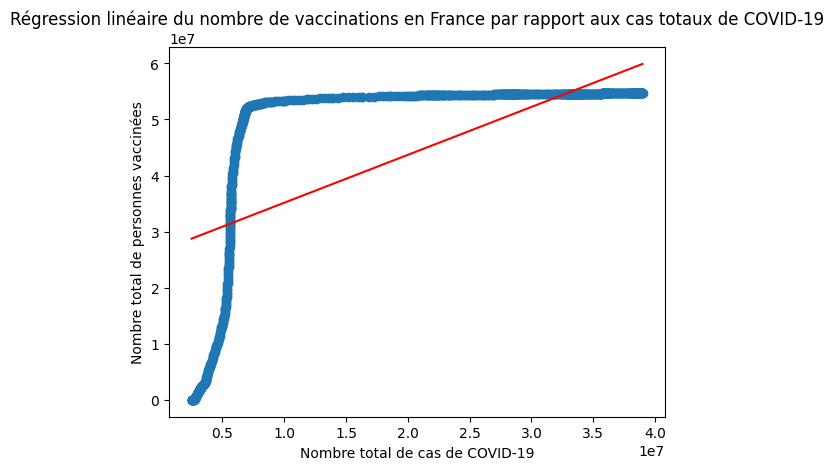

In [9]:
# Import des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Chargement des données de cas de COVID-19 en France
data_cases = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
data_cases = data_cases[data_cases['location']=='France'][['date', 'total_cases']]
data_cases = data_cases.dropna()

# Chargement des données de vaccination COVID-19 en France
data_vaccinations = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/France.csv')
data_vaccinations = data_vaccinations[['date', 'people_vaccinated']]
data_vaccinations = data_vaccinations.dropna()

# Joindre les données de cas et de vaccination en utilisant la date comme clé
data = pd.merge(data_cases, data_vaccinations, on='date')

# Préparation des données pour la régression linéaire
X = data[['total_cases']]
y = data['people_vaccinated']

# Création et entraînement du modèle de régression linéaire
reg = LinearRegression()
reg.fit(X, y)

# Prédiction du nombre de personnes vaccinées
predicted_vaccinations = reg.predict(X)

# Affichage du graphique des données et de la régression linéaire
plt.scatter(X, y)
plt.plot(X, predicted_vaccinations, color='red')
plt.title('Régression linéaire du nombre de vaccinations en France par rapport aux cas totaux de COVID-19')
plt.xlabel('Nombre total de cas de COVID-19')
plt.ylabel('Nombre total de personnes vaccinées')
plt.show()



In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Charger les données du COVID-19
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data = pd.read_csv(url)

# Prétraitement des données
data = data.drop(["Province/State", "Lat", "Long"], axis=1)
data = data.groupby("Country/Region").sum().reset_index()
data = data.melt(id_vars=["Country/Region"], var_name="Date", value_name="Confirmed")
data["Date"] = pd.to_datetime(data["Date"])

# Sélectionnez les données pour 2023
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)
data_2023 = data.loc[(data["Date"] >= start_date) & (data["Date"] <= end_date)]

# Prédictions pour un pays spécifique (par exemple, la France)
country = "France"
data_country = data_2023[data_2023["Country/Region"] == country]
data_country = data_country.set_index("Date")

# Création des variables de prédiction
X = (data_country.index - data_country.index.min()).days.values.reshape(-1, 1)
y = data_country["Confirmed"].values

# Diviser les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions et évaluation du modèle
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error for {country}: {mae:.2f}")

# Faire des prédictions pour des dates futures
future_dates = pd.date_range(end_date + pd.DateOffset(days=1), end_date + pd.DateOffset(days=30))
X_future = (future_dates - data_country.index.min()).days.values.reshape(-1, 1)
y_future_pred = model.predict(X_future)

# Arrondir les prédictions à l'entier le plus proche et les convertir en entiers
y_future_pred_rounded = np.round(y_future_pred).astype(int)

# Afficher les prédictions
predictions = pd.DataFrame({"Date": future_dates, "Predicted_Confirmed": y_future_pred_rounded})
print(predictions)



Mean Absolute Error for France: 1707883.11
         Date  Predicted_Confirmed
0  2023-01-01             41907127
1  2023-01-02             41970230
2  2023-01-03             42033334
3  2023-01-04             42096437
4  2023-01-05             42159540
5  2023-01-06             42222643
6  2023-01-07             42285747
7  2023-01-08             42348850
8  2023-01-09             42411953
9  2023-01-10             42475057
10 2023-01-11             42538160
11 2023-01-12             42601263
12 2023-01-13             42664367
13 2023-01-14             42727470
14 2023-01-15             42790573
15 2023-01-16             42853677
16 2023-01-17             42916780
17 2023-01-18             42979883
18 2023-01-19             43042986
19 2023-01-20             43106090
20 2023-01-21             43169193
21 2023-01-22             43232296
22 2023-01-23             43295400
23 2023-01-24             43358503
24 2023-01-25             43421606
25 2023-01-26             43484710
26 2023-01-2

Predicted number of people vaccinated in the world by 2023-12-31: 17.03 billion


C:\Users\Admin\AppData\Local\Temp\ipykernel_19188\3964899750.py:27: RuntimeWarning:

overflow encountered in exp



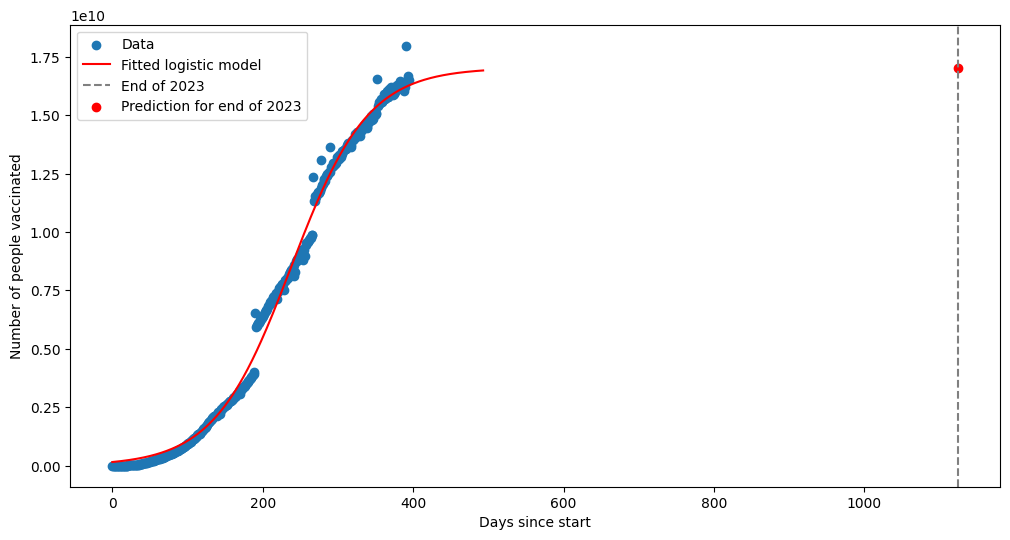

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Lire les données du fichier CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
data = pd.read_csv(url)

# Convertir les dates en format datetime
data["date"] = pd.to_datetime(data["date"])

# Filtrer les données jusqu'à 2021
data = data[data["date"] < datetime(2022, 1, 1)]

# Aggréger les données mondiales
world_data = data.groupby("date").agg({"people_vaccinated": "sum"}).reset_index()

# Préparer les données pour la régression
world_data["days_since_start"] = (world_data["date"] - world_data["date"].min()).dt.days
X = world_data["days_since_start"].values
y = world_data["people_vaccinated"].values

# Fonction de croissance logistique
def logistic_model(x, a, b, c):
    return c / (1 + np.exp(-(x - b) / a))

# Estimer les paramètres du modèle de croissance loagistique
initial_parameters = [2, 100, 2000]
params, _ = curve_fit(logistic_model, X, y, p0=initial_parameters)

# Faire des prédictions pour la fin de 2023
future_date = datetime(2023, 12, 31)
days_since_start_2023 = (future_date - world_data["date"].min()).days
X_future = np.array([days_since_start_2023])
y_future_pred = logistic_model(X_future, *params)

number_vaccinated = y_future_pred[0]
formatted_number = f"{number_vaccinated / 1e9:.2f} billion" if number_vaccinated >= 1e9 else f"{number_vaccinated / 1e6:.2f} million"

print(f"Predicted number of people vaccinated in the world by {future_date.strftime('%Y-%m-%d')}: {formatted_number}")

# Visualiser les données et les prédictions
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="Data")
plt.plot(np.arange(max(X) + 100), logistic_model(np.arange(max(X) + 100), *params), 'r-', label="Fitted logistic model")
plt.axvline(X_future, linestyle="--", color="gray", label="End of 2023")
plt.scatter(X_future, y_future_pred, marker="o", color="red", label="Prediction for end of 2023")
plt.xlabel("Days since start")
plt.ylabel("Number of people vaccinated")
plt.legend()
plt.show()


In [12]:
data_grippe = pd.read_csv("grippe2.csv",delimiter = ",")
data_grippe

,Entity,Code,Year,rate over65
0,Afghanistan,AFG,2011,62.57
1,Africa,NaN,2011,63.92
2,Albania,ALB,2011,29.59
3,Algeria,DZA,2011,54.98
4,Americas,NaN,2011,53.60
...,...,...,...,...
195,Western Pacific,NaN,2011,43.45
196,World,OWID_WRL,2011,53.40
197,Yemen,YEM,2011,58.73
198,Zambia,ZMB,2011,54.65


In [13]:
data_grippe = pd.read_csv("grippe2.csv",delimiter = ",")
data_grippe

df2 = data_grippe.sort_values(by = ['rate over65'],ascending = False).reset_index().head(10)

fig1 = px.bar(df2, x = 'Entity', y = 'rate over65', color = 'rate over65',
             color_continuous_scale = 'reds')

fig1.update_layout(title = 'Top 10 countries with the most influenza cases in Europe',
                  title_x = 0.5,
                  title_font = dict(size = 16, color = 'DarkRed'))
fig1.show()

In [14]:

import pandas as pd
import plotly.express as px

data = pd.read_csv("europe_covid.csv", delimiter=",")


df1 = data.sort_values(by=['Deaths/ 1M pop'],ascending = False).reset_index()

fig = px.choropleth(df1,
                    locations='Country/Other',
                    locationmode='country names',
                    color='Total Deaths',
                    scope='europe',
                    hover_name='Country/Other',
                    color_continuous_scale='reds')


fig.update_layout(title= 'COVID-19 Deaths in European Countries',
                  title_x = 0.5,
                  title_font = dict(size = 16, color = 'Darkred'),
                  geo = dict(showframe = False,
                             showcoastlines = False,
                             projection_type = 'equirectangular'))
fig.show()
